In [1]:
## Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from math import sqrt
import statsmodels.api as sm

In [2]:
## load the dataset
data=pd.read_csv("AutoInsurance.csv")

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

###  no missing value in data set

In [6]:
data.describe(include="all")

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,10/1/2011,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


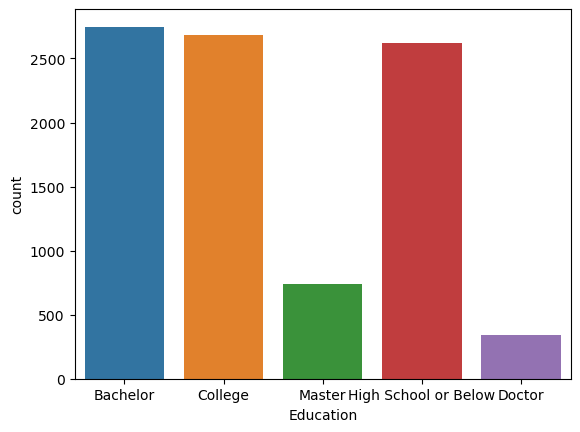

In [7]:
sns.countplot(x="Education",data=data)
plt.show()

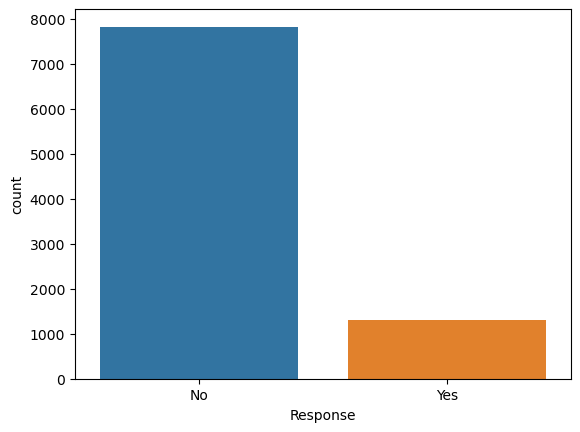

In [8]:
sns.countplot(x="Response",data=data)
plt.show()

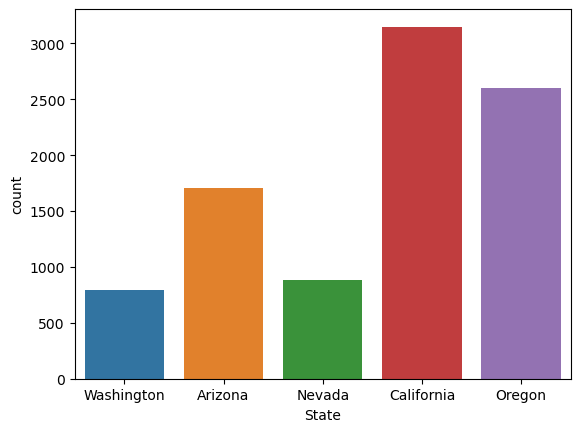

In [9]:
sns.countplot(x="State",data=data)
plt.show()

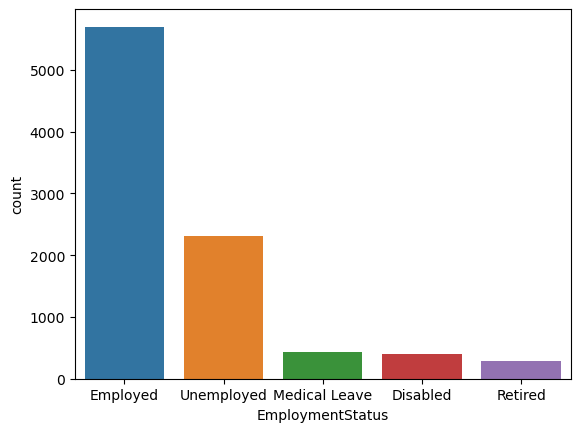

In [10]:
sns.countplot(x="EmploymentStatus",data=data)
plt.show()

 in data set no Employed are more

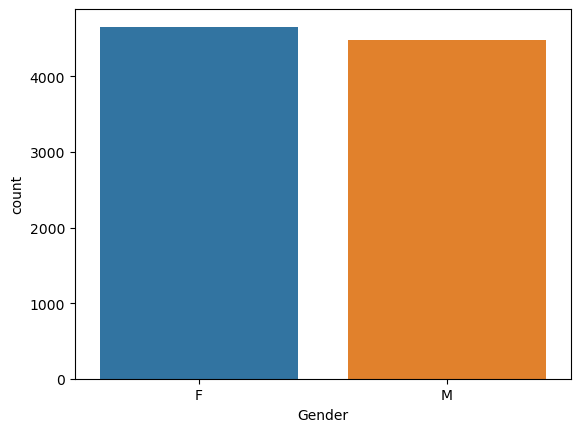

In [11]:
sns.countplot(x="Gender",data=data)
plt.show()

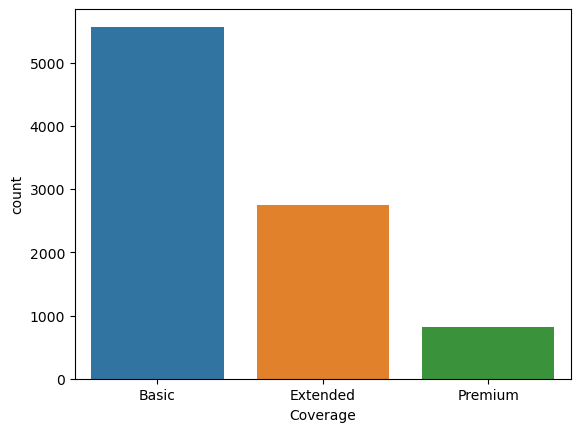

In [12]:
sns.countplot(x="Coverage",data=data)
plt.show()

Customer take 'Basic' coverage take more

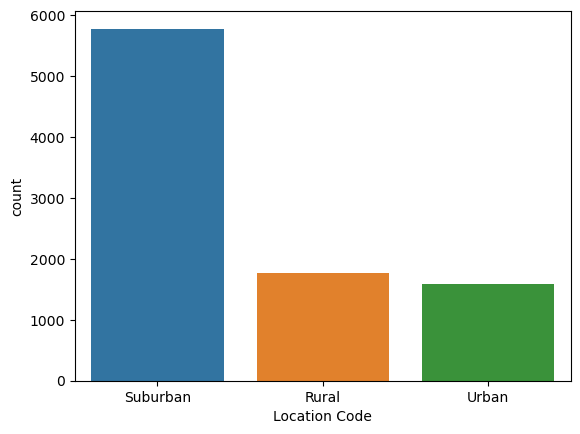

In [13]:
sns.countplot(x="Location Code",data=data)
plt.show()

costomer in suburban location are take more insurance coverage

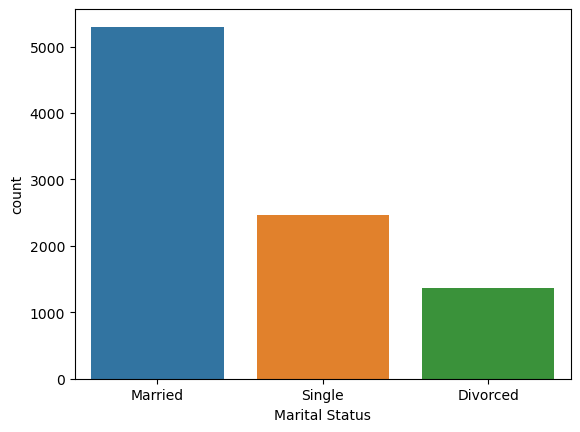

In [14]:
sns.countplot(x="Marital Status",data=data)
plt.show()

married customer are more

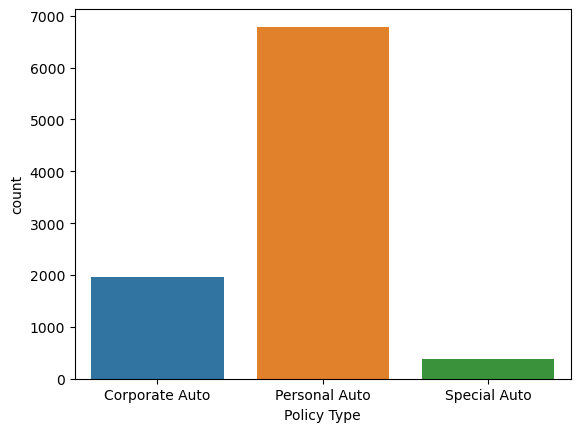

In [15]:
sns.countplot(x="Policy Type",data=data)
plt.show()

no of personal auto is more

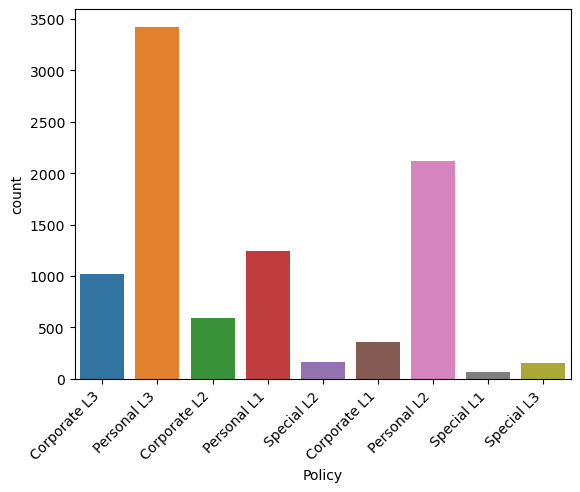

In [16]:
sns.countplot(x="Policy",data=data)
plt.xticks(rotation=45, ha="right")
plt.show()

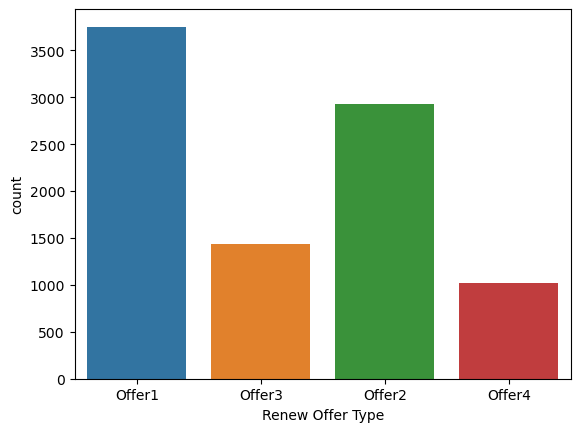

In [17]:
sns.countplot(x="Renew Offer Type",data=data)
plt.show()

Customer are choose more Offer1 type in Renew time

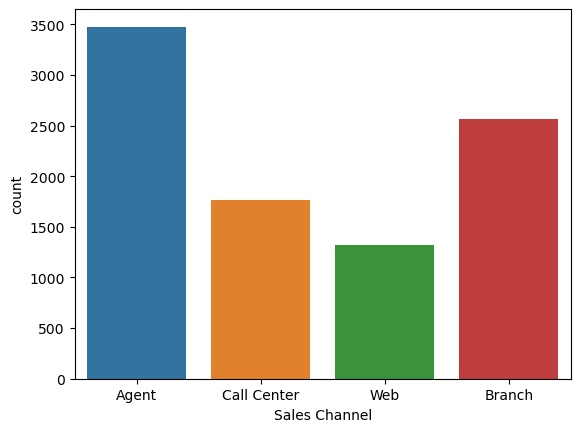

In [18]:
sns.countplot(x="Sales Channel",data=data)
plt.show()

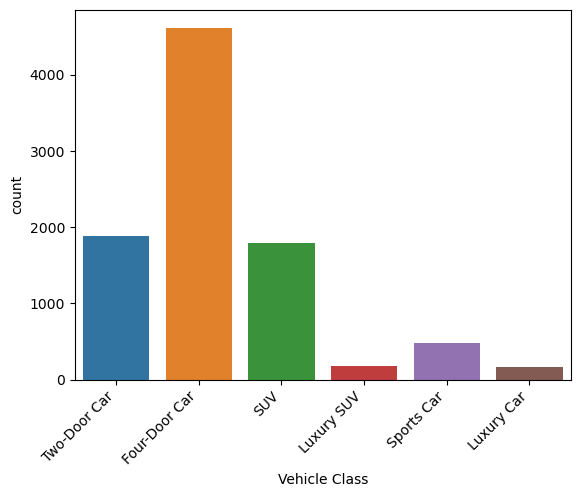

In [19]:
sns.countplot(x="Vehicle Class",data=data)
plt.xticks(rotation=45, ha="right")
plt.show()

customer are having four-door car take more insourece 

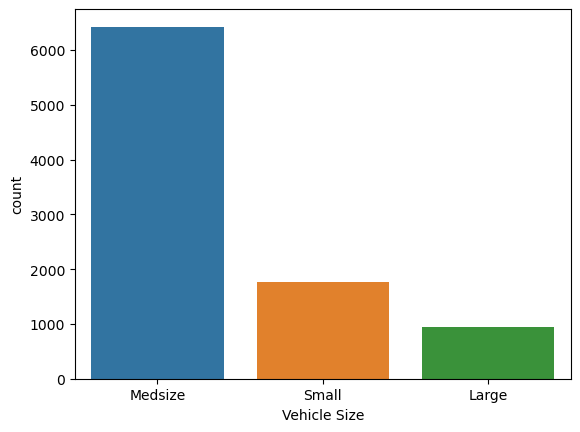

In [20]:
sns.countplot(x="Vehicle Size",data=data)
plt.show()

most vehicle are 'Medsize'

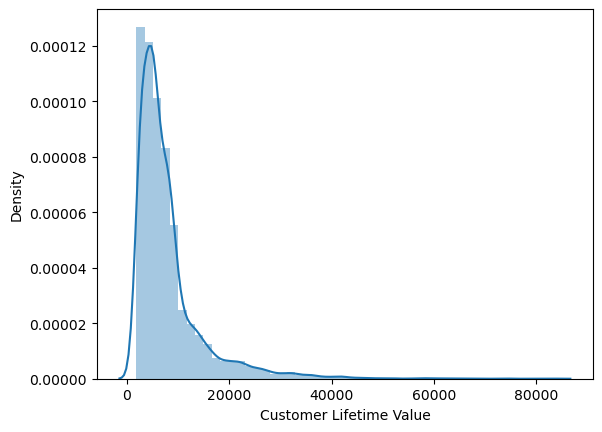

In [21]:
sns.distplot(data["Customer Lifetime Value"])
plt.show()

Customer Lifetime value is skewed

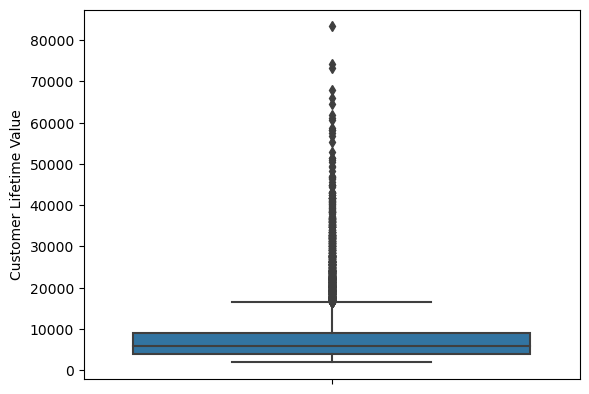

In [22]:
sns.boxplot(y="Customer Lifetime Value", data=data)
plt.show()

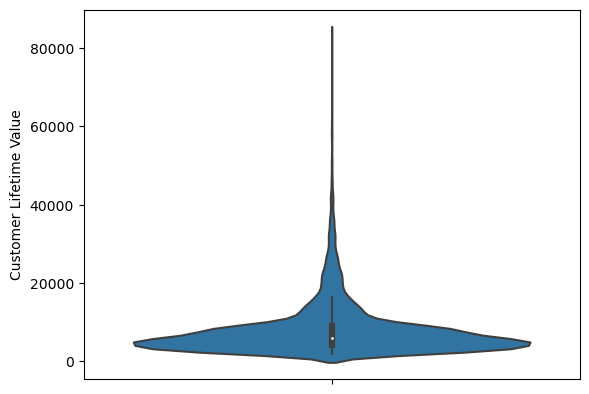

In [23]:
sns.violinplot(y="Customer Lifetime Value", data=data)
plt.show()

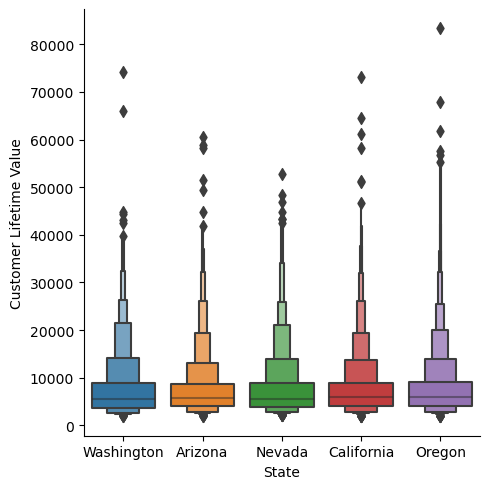

In [24]:
sns.catplot(data=data, x="State", y="Customer Lifetime Value", kind="boxen",)

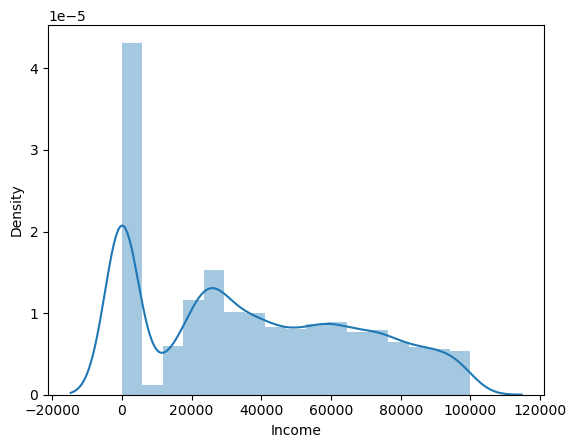

In [25]:
sns.distplot(data["Income"])
plt.show()

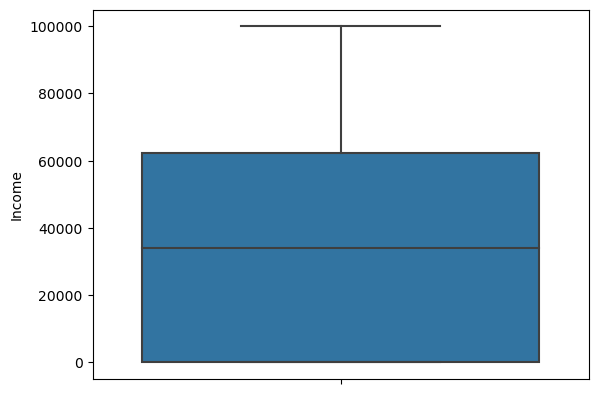

In [26]:
sns.boxplot(y="Income", data=data)
plt.show()

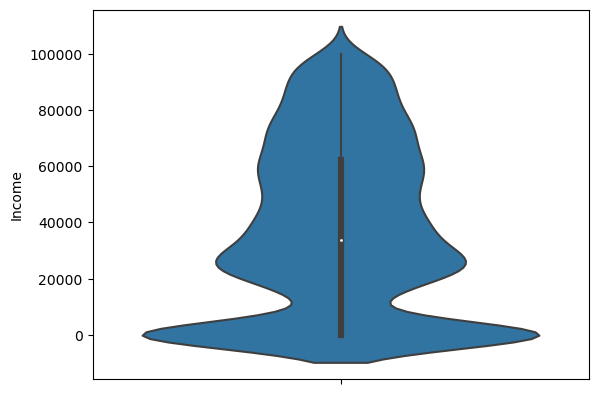

In [27]:
sns.violinplot(y="Income", data=data)
plt.show()

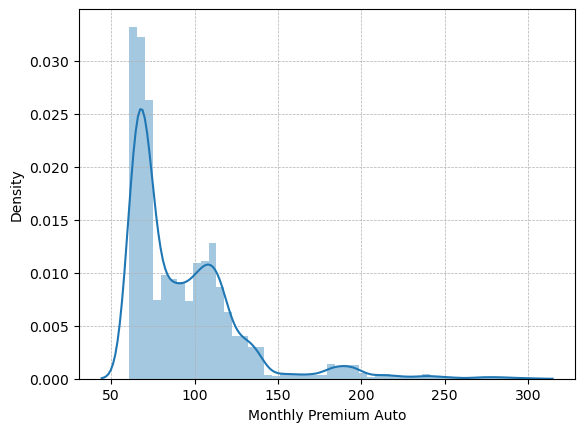

In [28]:
sns.distplot(data["Monthly Premium Auto"])
plt.grid(linestyle = '--', linewidth = .5)
plt.show()

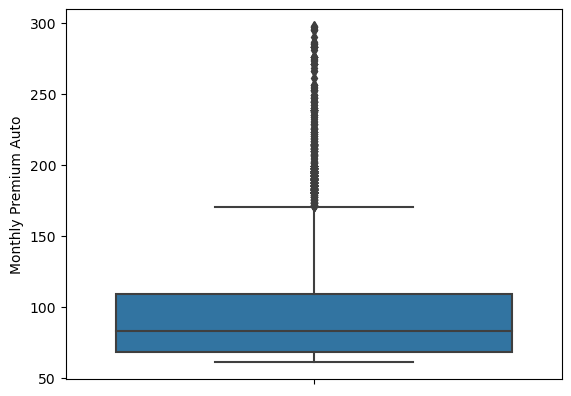

In [29]:
sns.boxplot(y="Monthly Premium Auto", data=data)
plt.show()

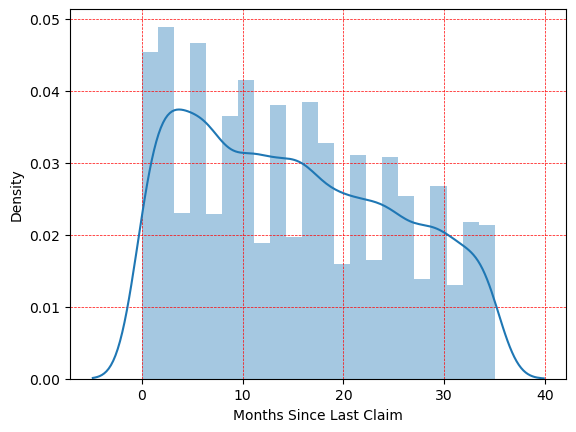

In [30]:
sns.distplot(data["Months Since Last Claim"])
plt.grid(color = 'r', linestyle = '--', linewidth = .5)
plt.show()

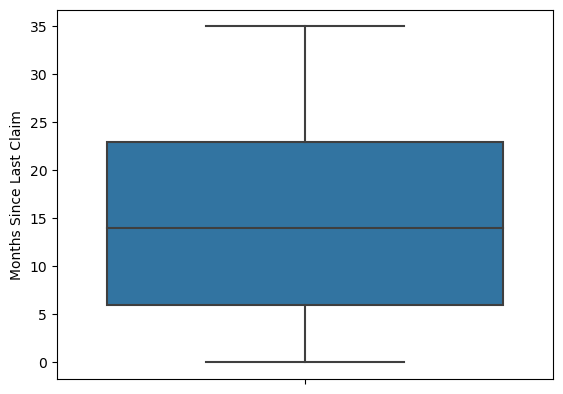

In [31]:
sns.boxplot(y="Months Since Last Claim", data=data)
plt.show()

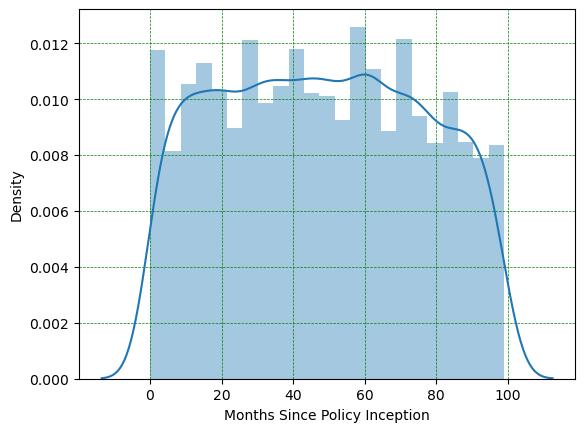

In [32]:
sns.distplot(data["Months Since Policy Inception"])
plt.grid(color = 'g', linestyle = '--', linewidth = .5)
plt.show()

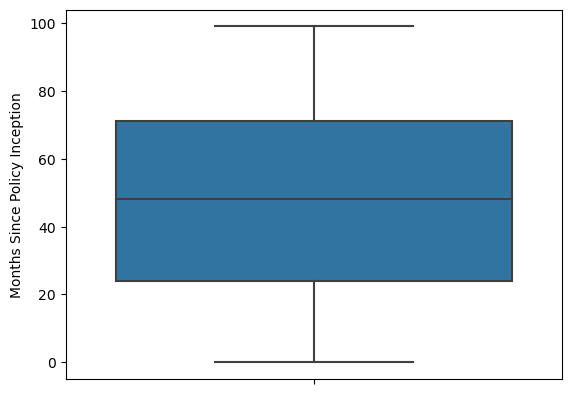

In [33]:
sns.boxplot(y="Months Since Policy Inception", data=data)
plt.show()

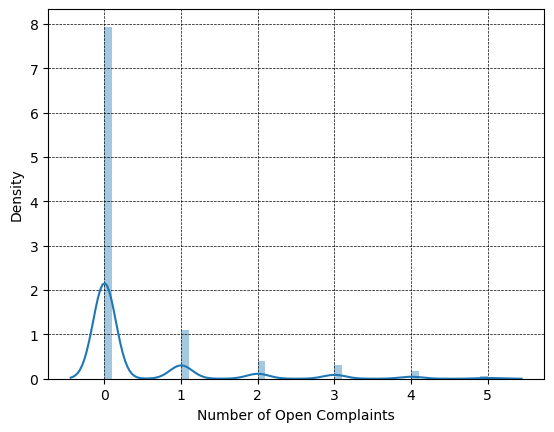

In [34]:
sns.distplot(data["Number of Open Complaints"])
plt.grid(color = 'black', linestyle = '--', linewidth = .5)
plt.show()

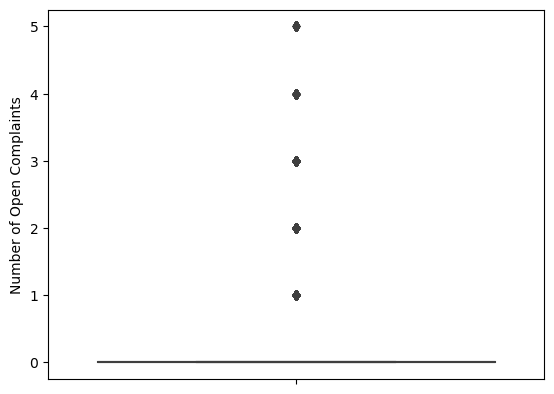

In [35]:
sns.boxplot(y="Number of Open Complaints", data=data)
plt.show()

'Number of Open Complaints' are outliers, i,e few complaints are their, most complaints no are zero

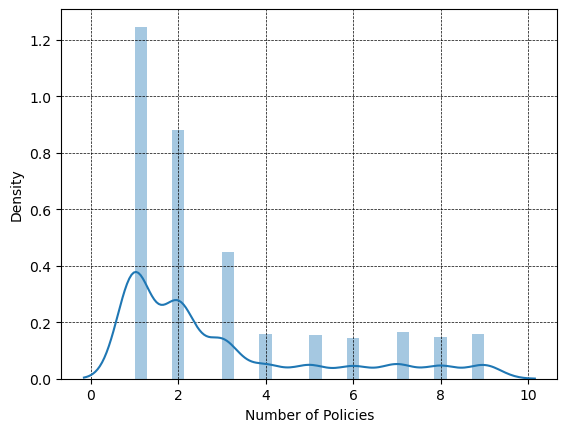

In [37]:
sns.distplot(data["Number of Policies"])
plt.grid(color = 'black', linestyle = '--', linewidth = .5)
plt.show()

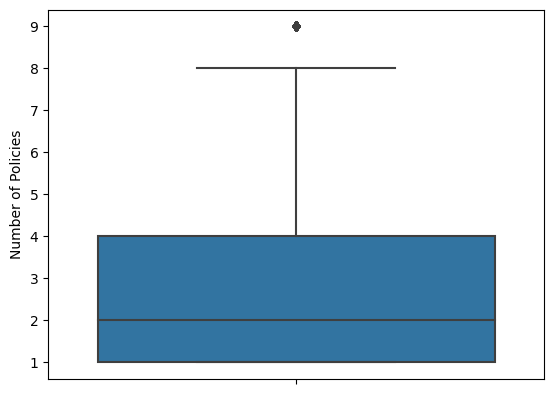

In [38]:
sns.boxplot(y="Number of Policies", data=data)
plt.show()

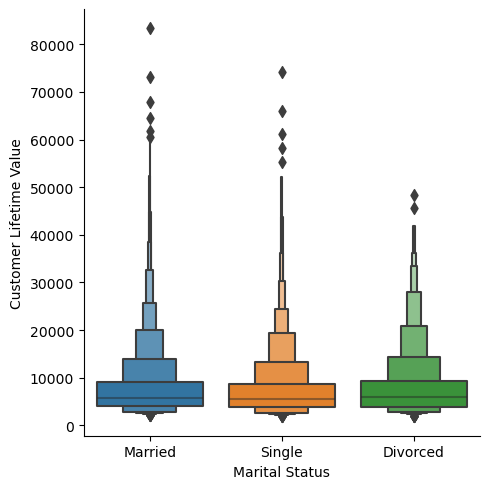

In [39]:
sns.catplot(data=data,
    x="Marital Status", y="Customer Lifetime Value", kind="boxen")

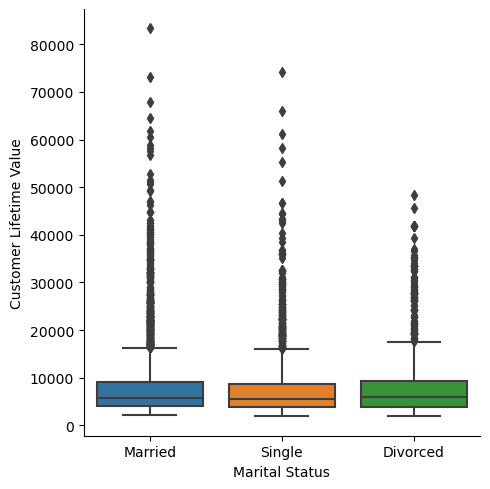

In [40]:
sns.catplot(data=data,
    x="Marital Status", y="Customer Lifetime Value", kind="box",)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Employed'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Medical Leave'),
  Text(3, 0, 'Disabled'),
  Text(4, 0, 'Retired')])

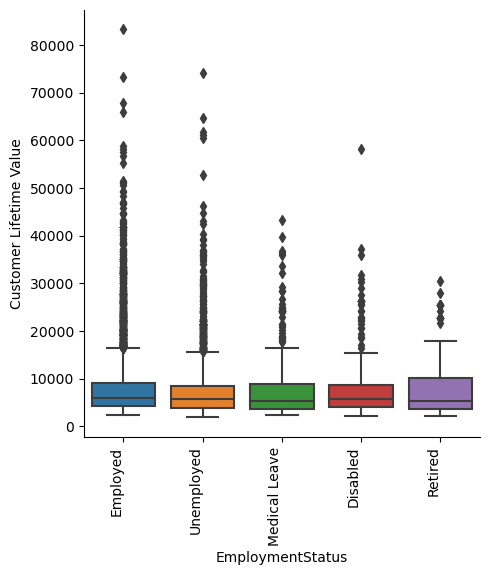

In [41]:
sns.catplot(data=data,
    x="EmploymentStatus", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


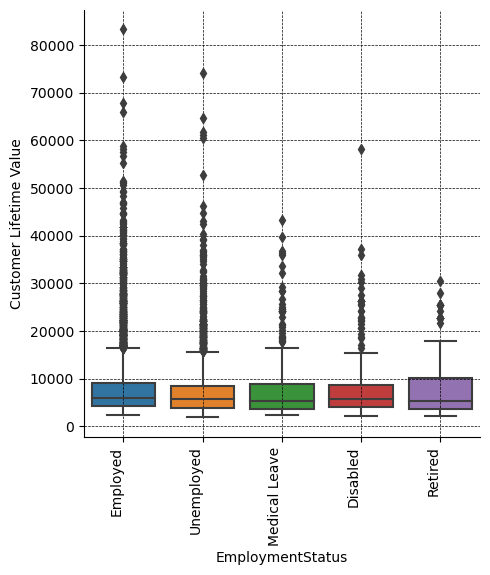

In [42]:
sns.catplot(data=data,x="EmploymentStatus", y="Customer Lifetime Value", kind="box")
plt.grid(color = 'black', linestyle = '--', linewidth = .5)
plt.xticks(rotation=90, ha="right")
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Washington'),
  Text(1, 0, 'Arizona'),
  Text(2, 0, 'Nevada'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Oregon')])

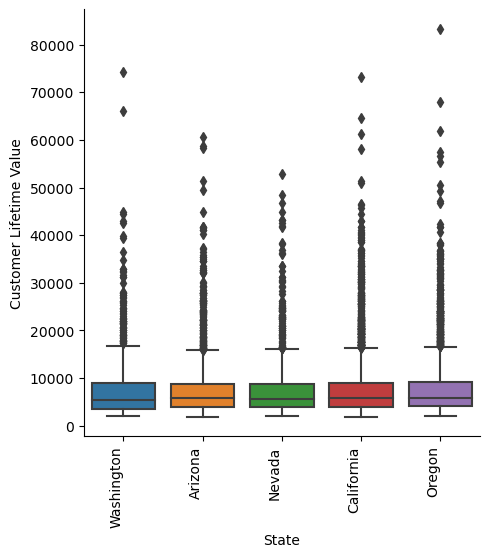

In [43]:
sns.catplot(data=data,x="State", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

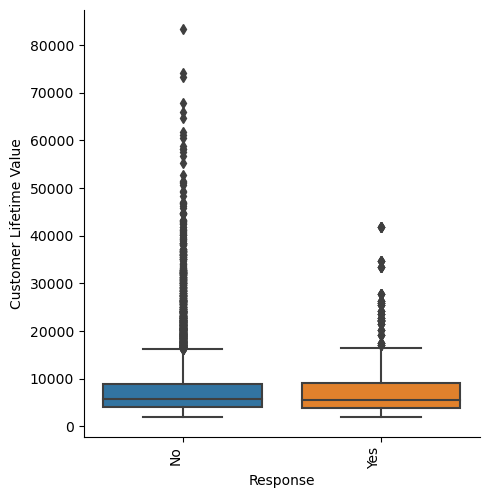

In [44]:
sns.catplot(data=data,x="Response", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Basic'), Text(1, 0, 'Extended'), Text(2, 0, 'Premium')])

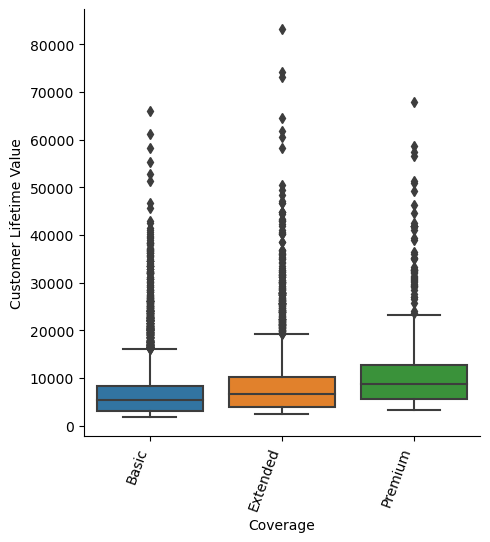

In [45]:
sns.catplot(data=data,x="Coverage", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=70, ha="right")


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'High School or Below'),
  Text(4, 0, 'Doctor')])

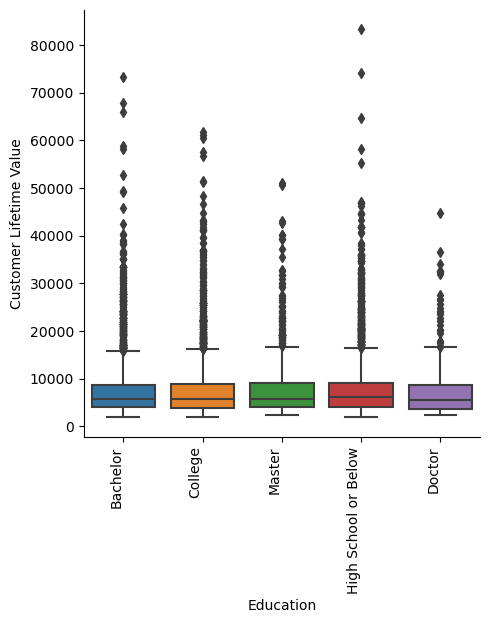

In [46]:
sns.catplot(data=data,x="Education", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

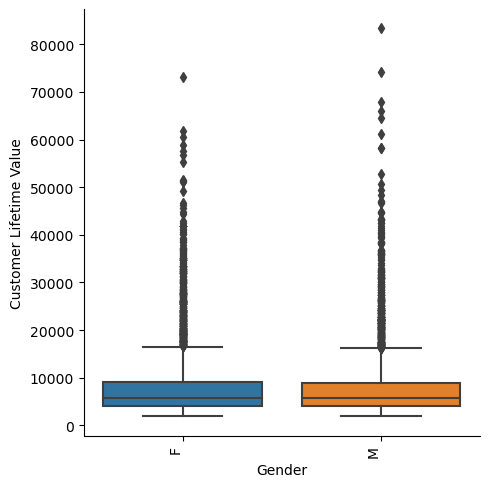

In [47]:
sns.catplot(data=data,x="Gender", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Suburban'), Text(1, 0, 'Rural'), Text(2, 0, 'Urban')])

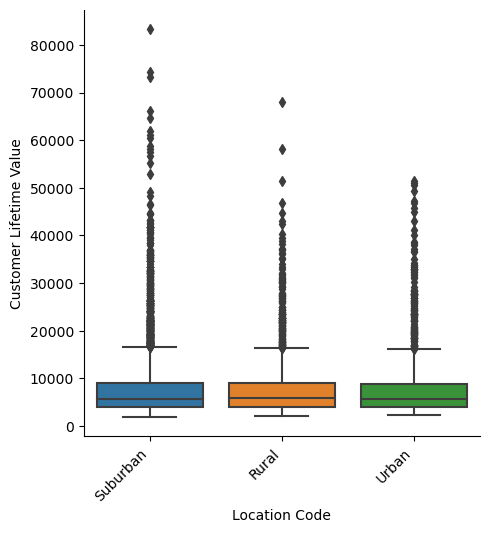

In [48]:
sns.catplot(data=data, x="Location Code", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=45, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Corporate Auto'),
  Text(1, 0, 'Personal Auto'),
  Text(2, 0, 'Special Auto')])

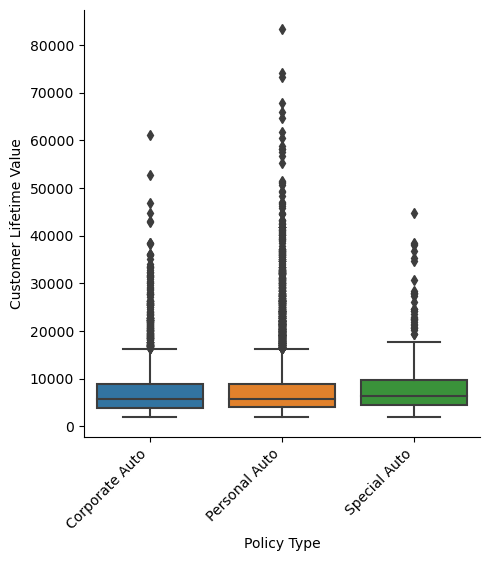

In [49]:
sns.catplot(data=data, x="Policy Type", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=45, ha="right")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Corporate L3'),
  Text(1, 0, 'Personal L3'),
  Text(2, 0, 'Corporate L2'),
  Text(3, 0, 'Personal L1'),
  Text(4, 0, 'Special L2'),
  Text(5, 0, 'Corporate L1'),
  Text(6, 0, 'Personal L2'),
  Text(7, 0, 'Special L1'),
  Text(8, 0, 'Special L3')])

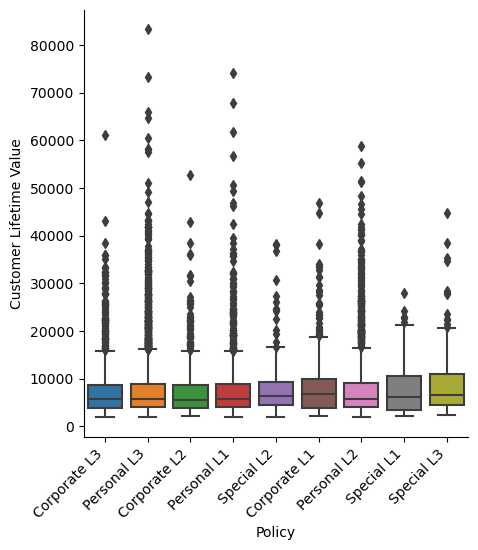

In [50]:
sns.catplot(data=data, x="Policy", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=45, ha="right")


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Offer1'),
  Text(1, 0, 'Offer3'),
  Text(2, 0, 'Offer2'),
  Text(3, 0, 'Offer4')])

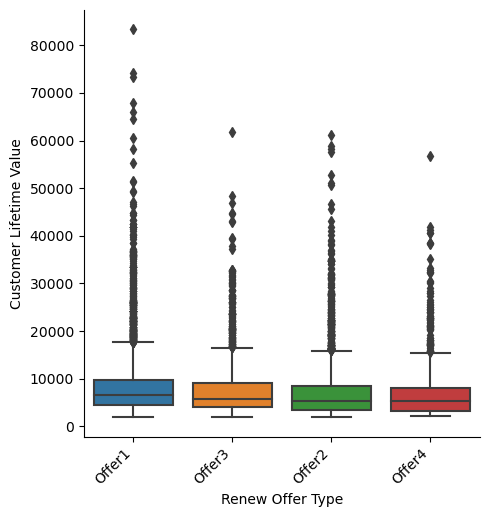

In [51]:
sns.catplot(data=data, x="Renew Offer Type", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=45, ha="right")


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agent'),
  Text(1, 0, 'Call Center'),
  Text(2, 0, 'Web'),
  Text(3, 0, 'Branch')])

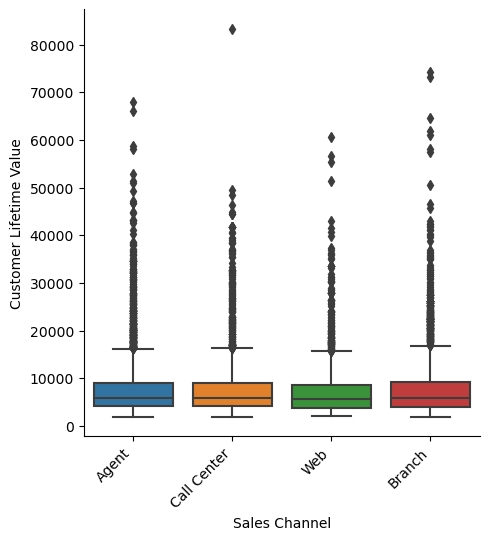

In [52]:
sns.catplot(data=data, x="Sales Channel", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=45, ha="right")


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Two-Door Car'),
  Text(1, 0, 'Four-Door Car'),
  Text(2, 0, 'SUV'),
  Text(3, 0, 'Luxury SUV'),
  Text(4, 0, 'Sports Car'),
  Text(5, 0, 'Luxury Car')])

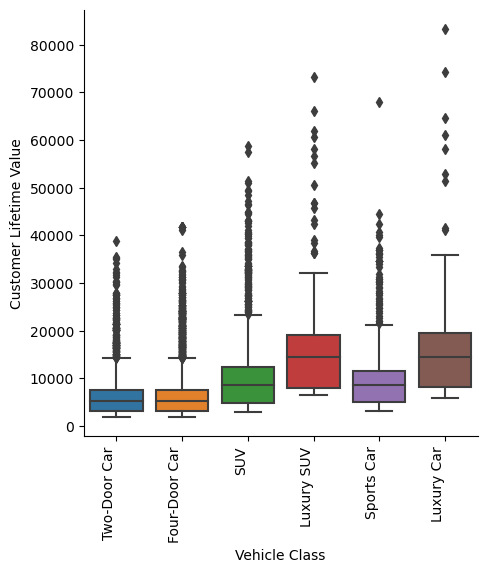

In [53]:
sns.catplot(data=data,
    x="Vehicle Class", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Medsize'), Text(1, 0, 'Small'), Text(2, 0, 'Large')])

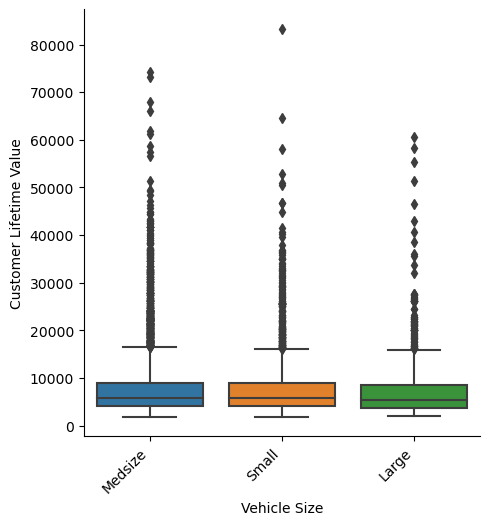

In [54]:
sns.catplot(data=data, x="Vehicle Size", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=45, ha="right")


In [55]:
data=data.drop(columns=["Customer","Number of Open Complaints","Effective To Date"],axis=1)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [57]:
data2=pd.get_dummies(data,columns=["State","Response","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class","Vehicle Size"])

In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Income                          9134 non-null   int64  
 2   Monthly Premium Auto            9134 non-null   int64  
 3   Months Since Last Claim         9134 non-null   int64  
 4   Months Since Policy Inception   9134 non-null   int64  
 5   Number of Policies              9134 non-null   int64  
 6   Total Claim Amount              9134 non-null   float64
 7   State_Arizona                   9134 non-null   uint8  
 8   State_California                9134 non-null   uint8  
 9   State_Nevada                    9134 non-null   uint8  
 10  State_Oregon                    9134 non-null   uint8  
 11  State_Washington                9134 non-null   uint8  
 12  Response_No                     91

# SPLIT DATA

In [59]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [60]:
# lets build our linear model
# independant variables
x = data2.drop(['Customer Lifetime Value'], axis=1)
# the dependent variable
y = data2[['Customer Lifetime Value']]

In [61]:
# Split x and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

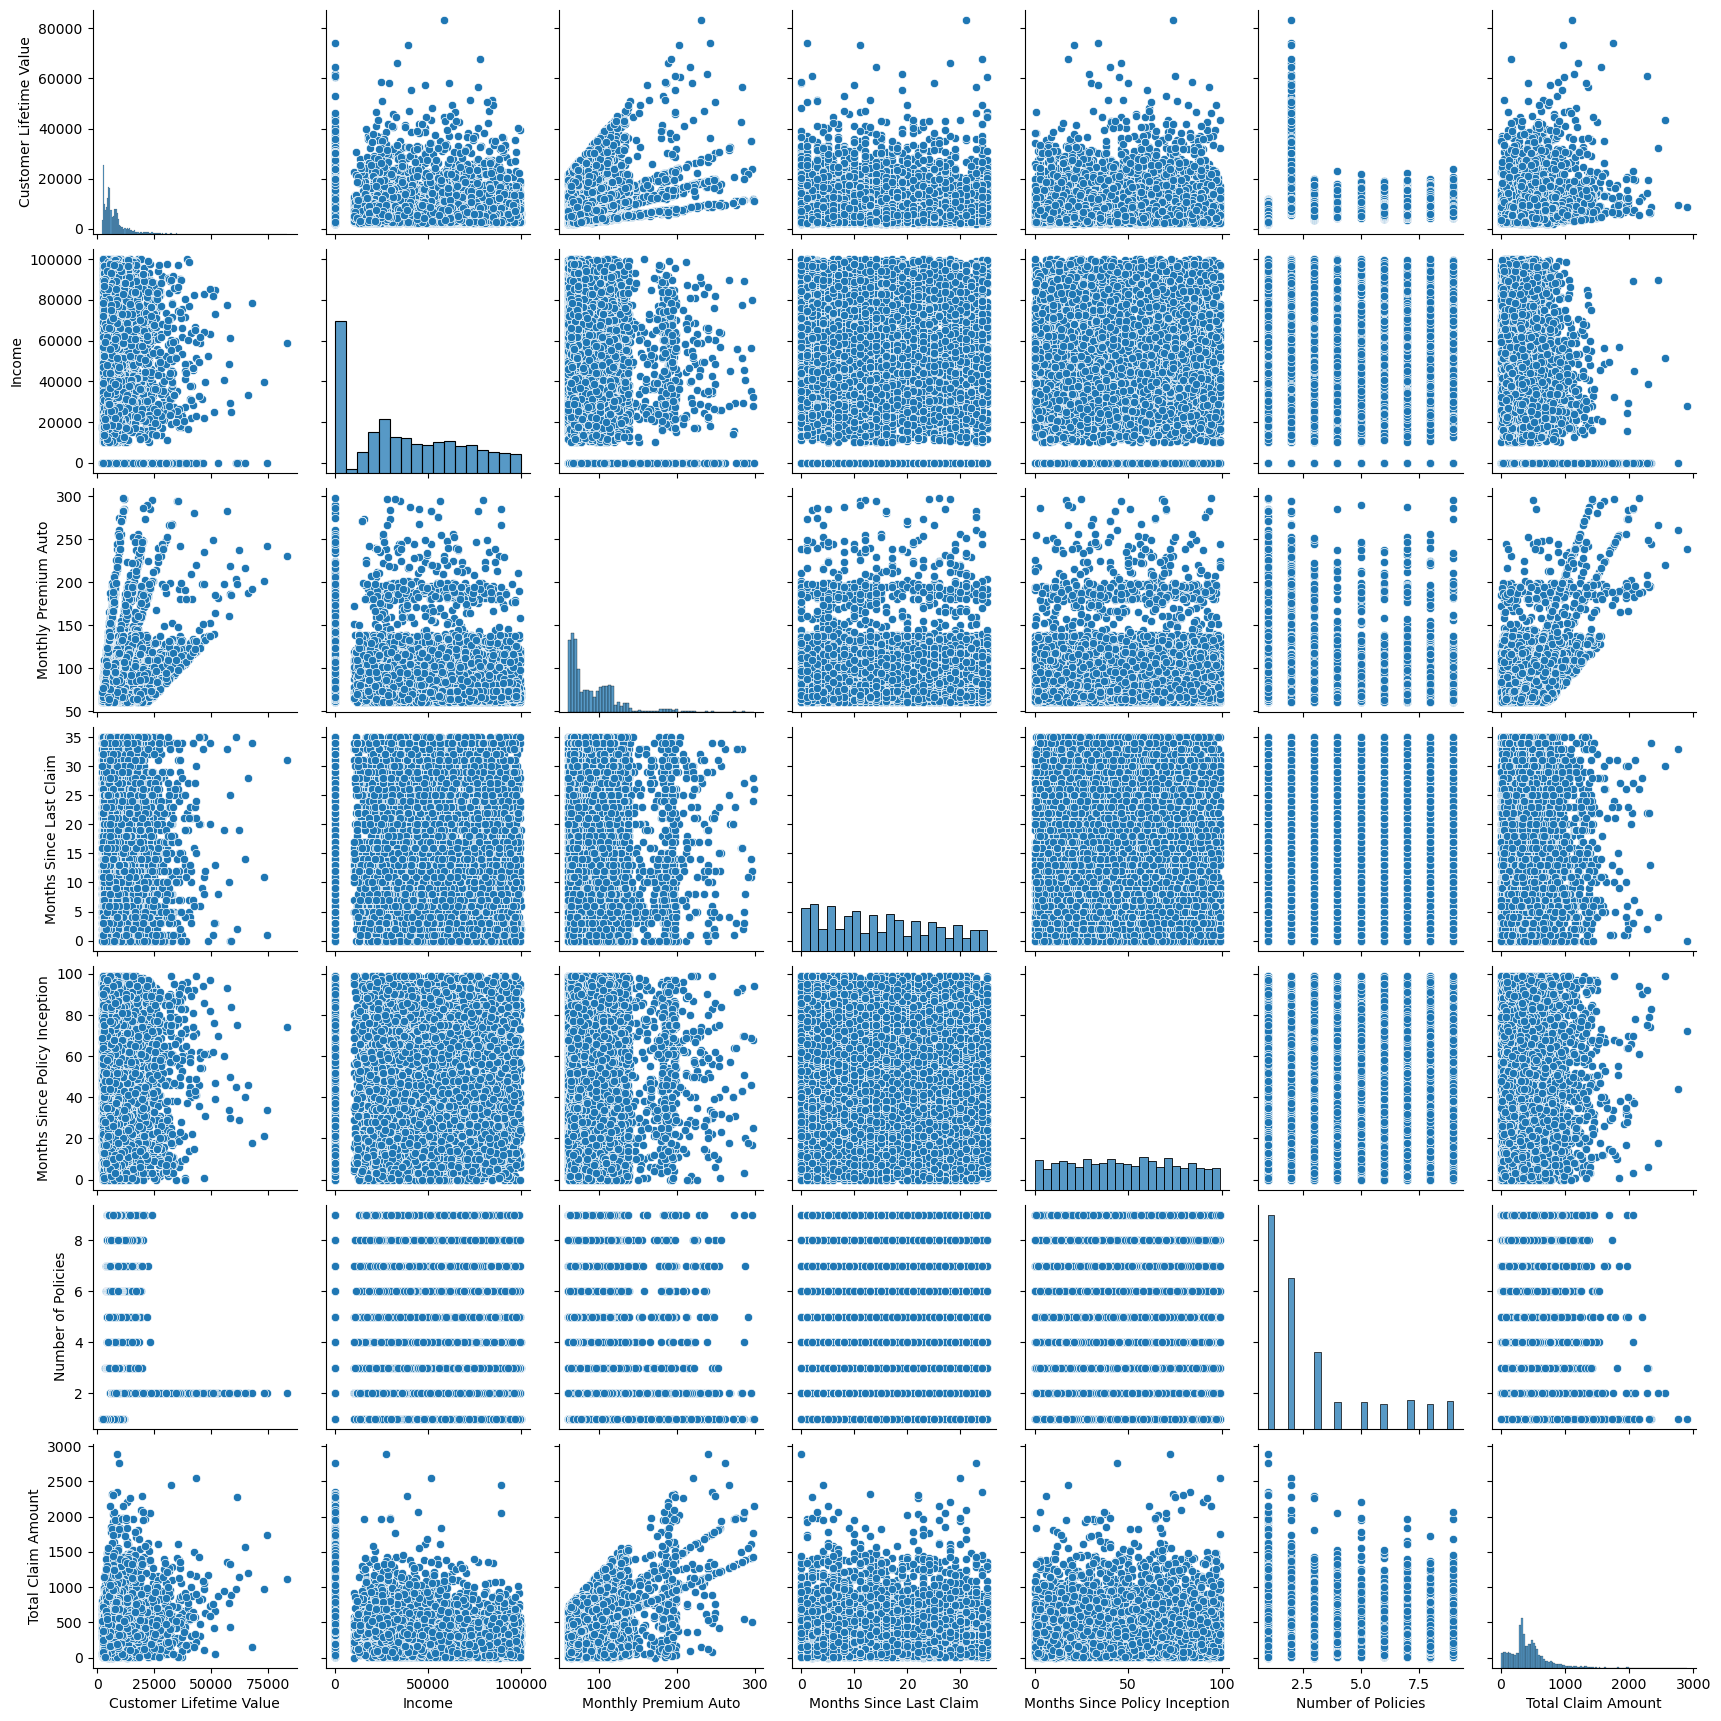

In [62]:
sns.pairplot(data)

# Mann-Whitney U test

In [63]:
mannwhitneyu(data2['Response_No'], data2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [64]:
mannwhitneyu(data2['Response_Yes'], data2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [65]:
mannwhitneyu(data2['EmploymentStatus_Employed'], data2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [66]:
mannwhitneyu(data2['Location Code_Rural'], data2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [67]:
mannwhitneyu(data2['Policy Type_Corporate Auto'], data2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [68]:
mannwhitneyu(data2['Policy_Corporate L3'], data2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [69]:
mannwhitneyu(data2['Policy_Special L3'], data2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [ ]:
from pingouin import mwu
mwu(data2['Policy_Special L3'], data2['Customer Lifetime Value'])

In [ ]:
mwu(data2['Sales Channel_Agent'], data2['Customer Lifetime Value'])

In [ ]:
mwu(data2['Vehicle Size_Large'], data2['Customer Lifetime Value'])

# Kruskal Wallis test

In [71]:
mystate=data["State"]
myresponse=data["Response"]
mycoverage=data["Coverage"]
myeducation=data["Education"]
myemploymentstatus=data["EmploymentStatus"]
mygender=data["Gender"]
mylocationcode=data["Location Code"]
mymaritalstatus=data["Marital Status"]
mypolicytype=data["Policy Type"]
mypolicy=data["Policy"]
myrenewoffertype=data["Renew Offer Type"]
mysaleschannel=data["Sales Channel"]
myvehicleclass=data["Vehicle Class"]
myvehiclesize=data["Vehicle Size"]

In [72]:
myCrosstable=pd.crosstab(mystate,myresponse)
myCrosstable

Response,No,Yes
State,,
Arizona,1460,243
California,2694,456
Nevada,758,124
Oregon,2225,376
Washington,689,109


In [73]:
kruskal(mystate,myresponse)

KruskalResult(statistic=1972.131590047541, pvalue=0.0)

In [74]:
myCrosstable2=pd.crosstab(myresponse,mycoverage)
myCrosstable2

Coverage,Basic,Extended,Premium
Response,,,
No,4770,2352,704
Yes,798,390,120


In [75]:
kruskal(myresponse,mycoverage)

KruskalResult(statistic=11011.731386365529, pvalue=0.0)

In [76]:
myCrosstable3=pd.crosstab(myemploymentstatus,myeducation)
myCrosstable3

Education,Bachelor,College,Doctor,High School or Below,Master
EmploymentStatus,,,,,
Disabled,121,98,22,118,46
Employed,1702,1664,249,1528,555
Medical Leave,126,145,17,115,29
Retired,88,102,1,72,19
Unemployed,711,672,53,789,92


In [77]:
kruskal(myemploymentstatus,myeducation)

KruskalResult(statistic=3642.2758854130657, pvalue=0.0)

# Model Building

In [78]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [79]:
model_1.score(x_train, y_train)

0.17919172256487803

In [80]:
model_1.score(x_test, y_test)

0.12933040844918553

In [105]:
y_pred=model_1.predict(x_test)

In [106]:
print(sqrt(mean_squared_error(y_test,y_pred)))

6164.095193785375


# Ridge and Lasso Regression

# Create a regularized RIDGE model and note the coefficients


In [107]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[-2.57959989e-03  6.03586950e+01  4.83504248e+00 -1.18422283e+00
   4.63679561e+01  1.99562542e-01 -6.68568237e+01  1.07204132e+02
  -1.60301549e+02  3.55675037e+01  8.43867368e+01  2.62757463e+02
  -2.62757463e+02 -2.48471739e+02  2.26200097e+01  2.25851729e+02
   2.50307787e+01 -1.26241405e+01 -2.40375690e+02  4.08016108e+02
  -1.80047056e+02 -3.13625944e+02  3.44387695e+02  9.93265845e+01
   2.20647606e+02 -3.50735941e+02  5.23689493e+01 -5.23689493e+01
   2.84407011e+01 -2.78272349e+02  2.49831648e+02 -2.34377993e+01
   1.56018374e+02 -1.32580575e+02 -1.53773109e+02 -1.03325837e+02
   2.57098947e+02  5.33697171e+02 -4.21045196e+02 -2.66425084e+02
  -9.61550790e+01  2.19091572e+01 -2.90799157e+01 -3.31767815e+02
  -3.32902786e+02  9.21769548e+02  5.23924161e+02 -1.79411211e+02
   1.46881327e+01 -3.59201083e+02 -5.14703216e+01  5.15695229e+01
   1.23751956e+02 -1.23851158e+02 -1.53822419e+03  1.60084075e+03
   1.47485610e+03 -1.81284330e+02 -1.00132734e+02 -1.25605559e+

In [108]:
ridge.score(x_train,y_train)

0.17919154151165861

In [109]:
ridge.score(x_test,y_test)

0.12937382897263872

# Create a regularized LASSO model and note the coefficients

In [89]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-2.56494809e-03  6.06331446e+01  4.83197079e+00 -1.18176326e+00
  4.63482941e+01  1.98639345e-01 -1.01730759e+02  7.14889810e+01
 -1.94729191e+02  0.00000000e+00  4.78575644e+01  5.24543928e+02
 -7.49405282e-14 -2.65437739e+02 -0.00000000e+00  1.94715891e+02
  3.72328111e+01 -0.00000000e+00 -2.25928073e+02  4.20187358e+02
 -1.66384829e+02 -4.10938609e+02  2.44559632e+02  0.00000000e+00
  1.17969863e+02 -4.49336708e+02  1.04207451e+02 -0.00000000e+00
 -0.00000000e+00 -3.05996506e+02  2.21075897e+02  0.00000000e+00
  1.79421957e+02 -1.08516078e+02 -2.03126504e+02  0.00000000e+00
  5.59122165e+01  7.13482091e+02 -2.38027266e+02 -8.39289557e+01
 -6.64247862e+01  5.06350231e+01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.25189236e+03  6.89618098e+02 -1.32761944e+01
  1.80170847e+02 -1.92507395e+02 -6.76356049e+01  3.47209567e+01
  1.06541590e+02 -1.39642726e+02 -1.34568388e+03  1.75626256e+03
  1.63013701e+03 -0.00000000e+00  7.81973647e+01 -1.06347418e+03
 -2.18843817

In [110]:
lasso.score(x_train,y_train)

0.17919117328132694

In [111]:
lasso.score(x_test,y_test)

0.12940609329747155

# Let us compare their scores

In [90]:
print(model_1.score(x_train, y_train))
print(model_1.score(x_test, y_test))


0.17919172256487803
0.12933040844918553


In [91]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.17919154151165861
0.12937382897263872


In [92]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.17919117328132694
0.12940609329747155


# Polynomial Regression

In [132]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(x_train)
X_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9999999976260427


In [133]:
print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.9999999976260427
-36.92461669576144


In [126]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
poly_clf.score(x_test2, y_test)

-0.09172751764791554

# Support Vector Regressor

In [134]:
from sklearn.svm import SVR

In [135]:
svr=SVR()
svr.fit(x_train, y_train) 
svr.score(x_test,y_test)

-0.10039117513775464

In [136]:
print("Support Vector Regressor Accuracy : {:.2f}%".format(svr.score(x_test,y_test)*100))

Support Vector Regressor Accuracy : -10.04%


In [137]:
svr1=SVR(
    kernel='rbf',
    degree=3,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [143]:
svr1.fit(x_train, y_train) 
svr1.score(x_test,y_test)

-0.09942343222193628

In [144]:
svr1.fit(x_train, y_train) 
print("SVR Accuracy with Auto : {:.2f}%".format(svr1.score(x_test,y_test)*100))

SVR Accuracy with Auto : -9.94%


In [145]:
y_pred1=svr.predict(x_test)

In [146]:
print(sqrt(mean_squared_error(y_test,y_pred1)))

6929.728153693332


# Decision Tree Regressor

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dtr=DecisionTreeRegressor(max_depth=6)

In [150]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [151]:
print("Decision Tree Regressor : {:.2f}%".format(dtr.score(x_test,y_test)*100))

Decision Tree Regressor : 66.82%


In [152]:
y_pred2=dtr.predict(x_test)

In [153]:
print(sqrt(mean_squared_error(y_test,y_pred2)))

3805.0105977425874


# RandomForestRegressor

In [155]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
rf=RandomForestRegressor(n_estimators=1000,random_state=1,max_depth=6)

In [157]:
rf.fit(x_train, y_train)
print("Random Forest Classifier : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Classifier : 69.06%


In [158]:
y_pred3=rf.predict(x_test)

In [159]:
print(sqrt(mean_squared_error(y_test,y_pred3)))

3674.6523746141547


# Bagging

In [160]:
from sklearn.ensemble import BaggingRegressor

In [161]:
bgr=BaggingRegressor(n_estimators=23)

In [162]:
bgr.fit(x_train, y_train)

BaggingRegressor(n_estimators=23)

In [163]:
print(bgr.score(x_train,y_train))
print(bgr.score(x_test,y_test))

0.9497958207672962
0.6970780396327


In [164]:
print("Bagging Regressor : {:.2f}%".format(bgr.score(x_test,y_test)*100))

Bagging Regressor : 69.71%


 This model is overfit

In [165]:
y_pred4=bgr.predict(x_test)

In [166]:
print(sqrt(mean_squared_error(y_test,y_pred4)))

3635.867331637407


# XG-Boost

In [167]:
import xgboost

In [168]:
xgbr=xgboost.XGBRFRegressor()

In [169]:
xgbr.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [170]:
print(xgbr.score(x_train,y_train))
print(xgbr.score(x_test,y_test))

0.7392753934566891
0.686419341715389


In [171]:
print("Boosting Regressor : {:.2f}%".format(xgbr.score(x_test,y_test)*100))

Boosting Regressor : 68.64%


Note: This model is suitable for this dataset

In [172]:
y_pred5=xgbr.predict(x_test)

In [173]:
print(sqrt(mean_squared_error(y_test,y_pred5)))

3699.2806632003003


# Adaboost

In [174]:
from sklearn.ensemble import AdaBoostRegressor

In [175]:
abr=AdaBoostRegressor()

In [176]:
abr.fit(x_train, y_train)

AdaBoostRegressor()

In [177]:
print(abr.score(x_train, y_train))
print(abr.score(x_test,y_test))

0.46006305343166454
0.41429851570280996


In [178]:
print("Adaboost Regressor : {:.2f}%".format(abr.score(x_test,y_test)*100))

Adaboost Regressor : 41.43%


In [179]:
y_pred6=abr.predict(x_test)

In [180]:
print(sqrt(mean_squared_error(y_test,y_pred6)))

5055.694359479559


# Gradient Boosting Regressor

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

In [182]:
gbr=GradientBoostingRegressor()

In [183]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [184]:
print(gbr.score(x_train, y_train))
print(gbr.score(x_test,y_test))

0.7373817574787511
0.6822288548377358


In [185]:
print("Gradient boost Regressor : {:.2f}%".format(gbr.score(x_test,y_test)*100))

Gradient boost Regressor : 68.22%


In [186]:
y_pred7=gbr.predict(x_test)

In [187]:
print(sqrt(mean_squared_error(y_test,y_pred7)))

3723.9160176210685


Note:- Only Gradient Boost Regressor Model will be suitable for this data

# Data Transformation using label encoder(df)

In [188]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [189]:
from sklearn.model_selection import cross_val_score

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [191]:
##Data processing fns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [192]:
data["State"]=le.fit_transform(data["State"])

In [193]:
data["Response"]=le.fit_transform(data["Response"])

In [194]:
data["Coverage"]=le.fit_transform(data["Coverage"])

In [195]:
data["Education"]=le.fit_transform(data["Education"])

In [196]:
data["EmploymentStatus"]=le.fit_transform(data["EmploymentStatus"])

In [197]:
data["Location Code"]=le.fit_transform(data["Location Code"])

In [198]:
data["Marital Status"]=le.fit_transform(data["Marital Status"])

In [199]:
data["Policy Type"]=le.fit_transform(data["Policy Type"])

In [200]:
data["Policy"]=le.fit_transform(data["Policy"])

In [201]:
data["Renew Offer Type"]=le.fit_transform(data["Renew Offer Type"])

In [202]:
data["Sales Channel"]=le.fit_transform(data["Sales Channel"])

In [203]:
data["Vehicle Class"]=le.fit_transform(data["Vehicle Class"])

In [204]:
data["Vehicle Size"]=le.fit_transform(data["Vehicle Size"])

In [205]:
data["Gender"]=le.fit_transform(data["Gender"])

In [206]:
data.dtypes

State                              int32
Customer Lifetime Value          float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Renew Offer Type                   int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

In [207]:
# lets build our linear model
# independant variables
X = data.drop(['Customer Lifetime Value'], axis=1)
# the dependent variable
Y = data[['Customer Lifetime Value']]

In [208]:
# Split x and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=0)

In [209]:
# Data modelling with outliers and without outliers is also a good approach but here we are not looking into here

In [210]:
model_2 = LinearRegression()
model_2.fit(X_train, Y_train)

LinearRegression()

In [211]:
model_2.score(X_train, Y_train)

0.17482407163494695

In [212]:
model_2.score(X_test, Y_test)

0.13050438683192633

In [213]:
y_pred8=model_2.predict(X_test)

In [214]:
print(sqrt(mean_squared_error(Y_test,y_pred8)))

6159.9380740327215


In [215]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_model2 = linear_model.LinearRegression()

poly_model2.fit(X_train2, Y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_model2.score(X_train2, Y_train))

0.21599948567940375


In [216]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_model2.score(X_test2, Y_test))

0.12275743637228986


In [217]:
from sklearn.svm import SVR

In [218]:
svr3=SVR()
svr3.fit(X_train, Y_train) 
svr3.score(X_test,Y_test)

-0.10039646232240917

In [219]:
print("Support Vector Regressor Accuracy : {:.2f}%".format(svr3.score(X_test,Y_test)*100))

Support Vector Regressor Accuracy : -10.04%


In [220]:
svr4=SVR(
    kernel='rbf',
    degree=3,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [221]:
svr4.fit(X_train, Y_train) 
svr4.score(X_test,Y_test)

-0.09945078758015158

In [222]:
svr4.fit(X_train, Y_train) 
print("SVR Accuracy with Auto : {:.2f}%".format(svr4.score(X_test,Y_test)*100))

SVR Accuracy with Auto : -9.95%


In [223]:
y_pred9=svr4.predict(X_test)

In [224]:
print(sqrt(mean_squared_error(Y_test,y_pred9)))

6926.766469183382


In [227]:
svr2=SVR(
    kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

# Decision Tree Regressor

In [230]:
dtr2=DecisionTreeRegressor(max_depth=6)
dtr2.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6)

In [231]:
print("Decision Tree Regressor : {:.2f}%".format(dtr2.score(X_test,Y_test)*100))

Decision Tree Regressor : 66.43%


In [232]:
y_pred10=dtr2.predict(X_test)

In [233]:
print(sqrt(mean_squared_error(Y_test,y_pred10)))

3827.806705506468


# Random Forest Regressor

In [235]:
rf2=RandomForestRegressor(n_estimators=1000,random_state=1,max_depth=6)

In [236]:
rf2.fit(X_train, Y_train)
print("Random Forest Regressor : {:.2f}%".format(rf2.score(X_test,Y_test)*100))

Random Forest Regressor : 69.01%


In [237]:
y_pred11=rf2.predict(X_test)

In [238]:
print(sqrt(mean_squared_error(Y_test,y_pred11)))

3677.5008678692166


# Bagging

In [239]:
bgr2=BaggingRegressor(n_estimators=23)

In [240]:
bgr2.fit(X_train, Y_train)

BaggingRegressor(n_estimators=23)

In [241]:
print(bgr2.score(X_train,Y_train))
print(bgr2.score(X_test,Y_test))

0.9494110274493361
0.7108154817601597


In [242]:
print("Bagging Regressor : {:.2f}%".format(bgr2.score(X_test,Y_test)*100))

Bagging Regressor : 71.08%


In [243]:
y_pred12=bgr2.predict(X_test)

In [244]:
print(sqrt(mean_squared_error(Y_test,y_pred12)))

3552.467946693658


Here model is overfitted

# XG-Boost

In [245]:
xgbr2=xgboost.XGBRFRegressor()

In [246]:
xgbr2.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [247]:
print(xgbr2.score(X_train,Y_train))
print(xgbr2.score(X_test,Y_test))

0.7382849712588868
0.6860473333868877


In [248]:
print("Boosting Regressor : {:.2f}%".format(xgbr2.score(X_test,Y_test)*100))

Boosting Regressor : 68.60%


In [249]:
y_pred13=xgbr2.predict(X_test)

In [250]:
print(sqrt(mean_squared_error(Y_test,y_pred13)))

3701.47428592193


# Adaboost

In [251]:
abr2=AdaBoostRegressor()

In [252]:
abr2.fit(X_train, Y_train)

AdaBoostRegressor()

In [253]:
print(abr2.score(X_train, Y_train))
print(abr2.score(X_test,Y_test))

0.5546777702235395
0.5123458662998628


In [254]:
print("Adaboost Regressor : {:.2f}%".format(abr2.score(X_test,Y_test)*100))

Adaboost Regressor : 51.23%


In [255]:
y_pred14=abr2.predict(X_test)

In [256]:
print(sqrt(mean_squared_error(Y_test,y_pred14)))

4613.1609125893965


# Gradient Boost

In [257]:
gbr2=GradientBoostingRegressor()

In [258]:
gbr2.fit(X_train, Y_train)

GradientBoostingRegressor()

In [259]:
print(gbr2.score(X_train, Y_train))
print(gbr2.score(X_test,Y_test))

0.7355973319438044
0.6807179677026678


In [260]:
print("Gradient boost Regressor : {:.2f}%".format(gbr2.score(X_test,Y_test)*100))

Gradient boost Regressor : 68.07%


In [261]:
y_pred15=gbr2.predict(X_test)

In [262]:
print(sqrt(mean_squared_error(Y_test,y_pred15)))

3732.7584579203085
